In [1]:
!pip install wandb

In [1]:
import wandb
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.datasets import fetch_covtype

In [2]:
wandb.login()

wandb: Currently logged in as: brinashong. Use `wandb login --relogin` to force relogin


True

In [3]:
%run 'common.ipynb'

In [4]:
# Function to evaluate and print model performance
def evaluate_model(model, X_train, y_train, X_test, y_test):
    seconds = time.time()
    # Train the model
    model.fit(X_train, y_train)
    training_time = time.time() - seconds
    print("Train operation time: = ", training_time, "seconds")
    wandb.log({"Training time (seconds)": training_time})
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Print model evaluation metrics
    return evaluate(y_test, y_pred, f"\nModel: {model.__class__.__name__}")

In [5]:
# Dictionary to store models and their names
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine (SVM)": SVC()
}

In [6]:
%run cicids.ipynb

In [7]:
# Should already be one hot encoded and label encoded
all_df, main_labels, config = get_cicids_df()
TARGET_COLUMN = config['TARGET_COLUMN']
NUMERICAL_COLUMNS = config['NUMERICAL_COLUMNS']
CATEGORICAL_COLUMNS = config['CATEGORICAL_COLUMNS']
ORDINAL_COLUMNS = config['ORDINAL_COLUMNS']
all_df.head()

Normal class:  0    Benign
dtype: object


,Unnamed: 0,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,ClassLabel
0,334691,51990738,3,1,43.0,6.0,31.0,14.333333,14.433757,6.0,...,20,0.0,0.0,0.0,0.0,51940550.0,0.00,51940552.0,51940552.0,Benign
1,8039727,117384013,80,144,974.0,199741.0,275.0,12.175000,44.683636,1460.0,...,20,506187.0,628091.8,950315.0,62059.0,58155176.0,132745.16,58249039.0,58061309.0,Benign
2,4848412,246,2,2,64.0,204.0,32.0,32.000000,0.000000,102.0,...,32,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,Benign
3,7260100,200929,13,11,1293.0,4610.0,694.0,99.461540,189.770750,1430.0,...,20,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,Benign
4,4998983,2446230,8,7,1144.0,1581.0,677.0,143.000000,227.969920,1173.0,...,20,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,Benign


In [8]:
# Get X and y from all_df
X_df = all_df.drop(columns=[TARGET_COLUMN])
y_df = all_df[TARGET_COLUMN]

# Split the data into training and testing sets (80% train, 20% test)
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_df, y_df, test_size=0.2, random_state=42)
print(X_train_df.shape, X_test_df.shape, y_train_df.shape, y_test_df.shape)

(1629792, 58) (407448, 58) (1629792,) (407448,)


In [9]:
# Scale the features (required for some models, especially SVM)
scaler = StandardScaler()

X_train_scaled_df = X_train_df.copy()
X_train_scaled_df[NUMERICAL_COLUMNS] = scaler.fit_transform(X_train_scaled_df[NUMERICAL_COLUMNS])

X_test_scaled_df = X_test_df.copy()
X_test_scaled_df[NUMERICAL_COLUMNS] = scaler.transform(X_test_scaled_df[NUMERICAL_COLUMNS])

Train operation time: =  26.60040545463562 seconds

Model: LogisticRegression
Confusion Matrix:
[[319007      0      0      0      0      0      0      0]
 [  6444      0      0      0      0      0      0      0]
 [  4646      0      0      0      0      0      0      0]
 [ 55431      0      0      0      0      0      0      0]
 [ 17562      0      0      0      0      0      0      0]
 [  4123      0      0      0      0      0      0      0]
 [   108      0      0      0      0      0      0      0]
 [   127      0      0      0      0      0      0      0]]


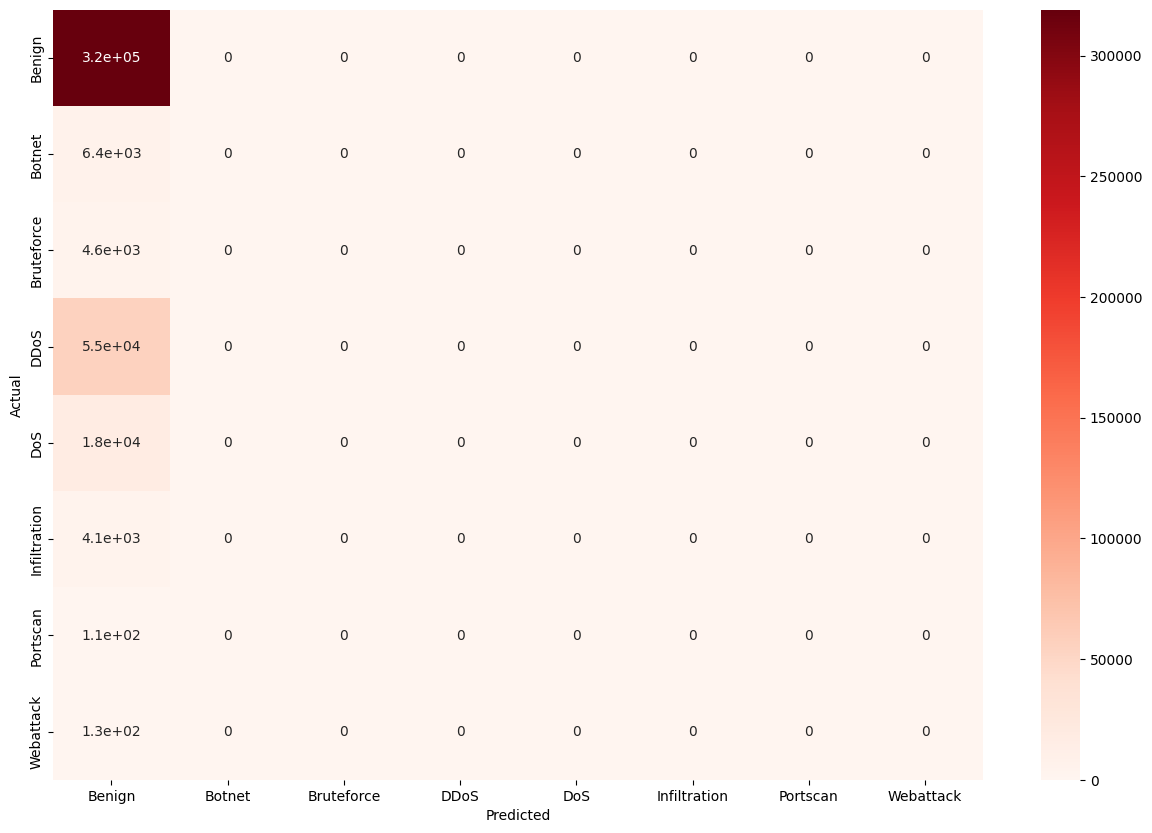

/home/brina/miniconda3/envs/gpu/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/brina/miniconda3/envs/gpu/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/brina/miniconda3/envs/gpu/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
{'Benign': {'precision': 0.7829391726060749, 'recall': 1.0, 'f1-score': 0.8782567399219497, 'support': 319007.0}, 'Botnet': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 6444.0}, 'Bruteforce': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 4646.0}, 'DDoS': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 55431.0}, 'DoS': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 17562.0}, 'Infiltration': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 4123.0}, 'Portscan': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 108.0}, 'Webattack': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 127.0}, 'accuracy': 0.7829391726060749, 'macro avg': {'precision': 0.09786739657575937, 'recall': 0.125, 'f1-score': 0.10978209249024372, 'support': 407448.0}, 'weighted avg': {'precision': 0.6129937480010852, 'recall': 0.7829391726060749, 'f1-score': 0.6876216052902001, 'support': 407448.0}}

Accuracy Score,▁
Training time (seconds),▁
f1-score_avg,▁
precision_avg,▁
recall_avg,▁
Accuracy Score,0.78294
Training time (seconds),26.60041
f1-score_avg,0.68762
precision_avg,0.61299
recall_avg,0.78294


Train operation time: =  83.48232007026672 seconds

Model: DecisionTreeClassifier
Confusion Matrix:
[[318017      7      6     23     46    893      5     10]
 [     8   6436      0      0      0      0      0      0]
 [     4      0   4642      0      0      0      0      0]
 [    35      0      1  55394      1      0      0      0]
 [    43      0      0      2  17517      0      0      0]
 [   783      0      0      0      0   3340      0      0]
 [     2      0      0      2      0      0    104      0]
 [     4      0      0      0      0      0      0    123]]


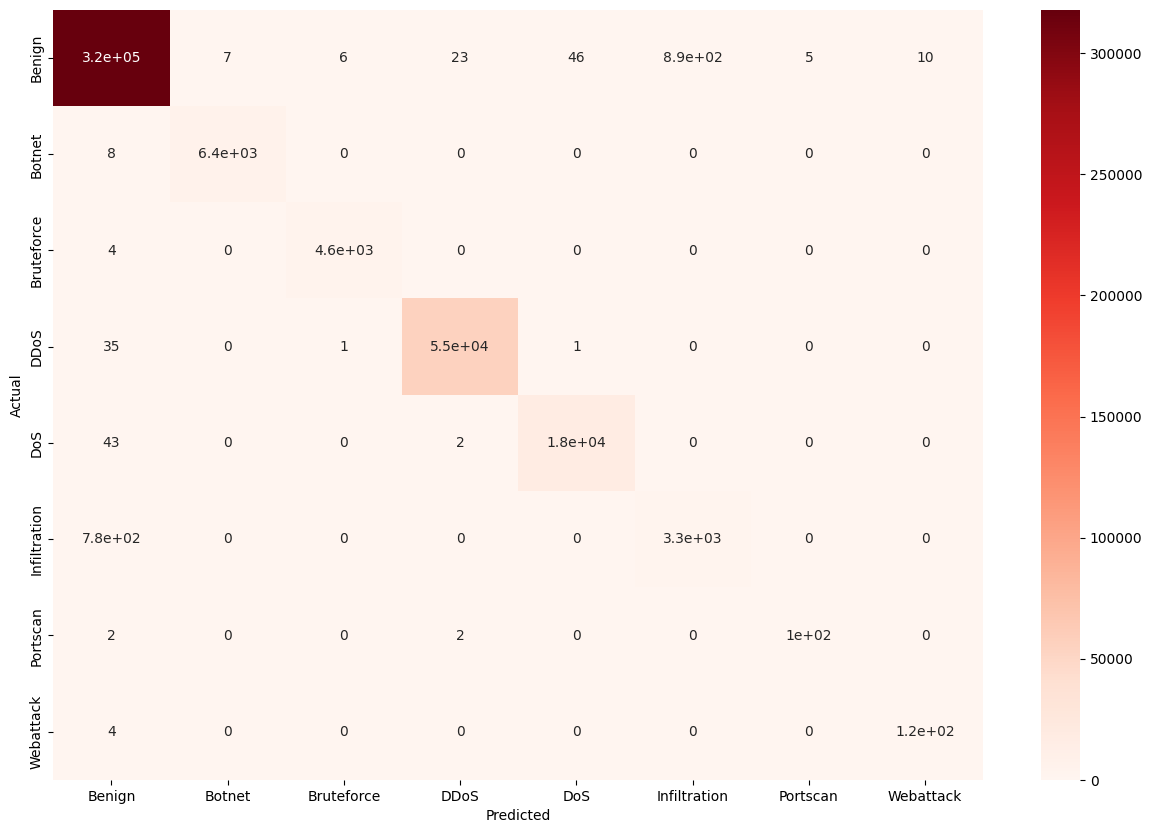


Classification Report:
{'Benign': {'precision': 0.9972436154733831, 'recall': 0.9968966198233895, 'f1-score': 0.9970700874584382, 'support': 319007.0}, 'Botnet': {'precision': 0.9989135495887009, 'recall': 0.9987585350713842, 'f1-score': 0.9988360363156669, 'support': 6444.0}, 'Bruteforce': {'precision': 0.99849429984943, 'recall': 0.9991390443392165, 'f1-score': 0.9988165680473372, 'support': 4646.0}, 'DDoS': {'precision': 0.9995128200501615, 'recall': 0.999332503472786, 'f1-score': 0.9994226536282611, 'support': 55431.0}, 'DoS': {'precision': 0.9973240719653838, 'recall': 0.9974376494704476, 'f1-score': 0.9973808574844844, 'support': 17562.0}, 'Infiltration': {'precision': 0.7890385069690526, 'recall': 0.8100897404802329, 'f1-score': 0.7994255624700815, 'support': 4123.0}, 'Portscan': {'precision': 0.9541284403669725, 'recall': 0.9629629629629629, 'f1-score': 0.9585253456221199, 'support': 108.0}, 'Webattack': {'precision': 0.924812030075188, 'recall': 0.968503937007874, 'f1-score':

Accuracy Score,▁
Training time (seconds),▁
f1-score_avg,▁
precision_avg,▁
recall_avg,▁
Accuracy Score,0.9954
Training time (seconds),83.48232
f1-score_avg,0.99543
precision_avg,0.99546
recall_avg,0.9954


Train operation time: =  682.0057022571564 seconds

Model: RandomForestClassifier
Confusion Matrix:
[[318647      2      0     10      5    343      0      0]
 [    20   6424      0      0      0      0      0      0]
 [    10      0   4636      0      0      0      0      0]
 [    48      0      0  55378      5      0      0      0]
 [    58      0      0      0  17504      0      0      0]
 [  3134      0      0      0      0    989      0      0]
 [     4      0      0      7      0      0     97      0]
 [    26      0      0      0      0      0      0    101]]


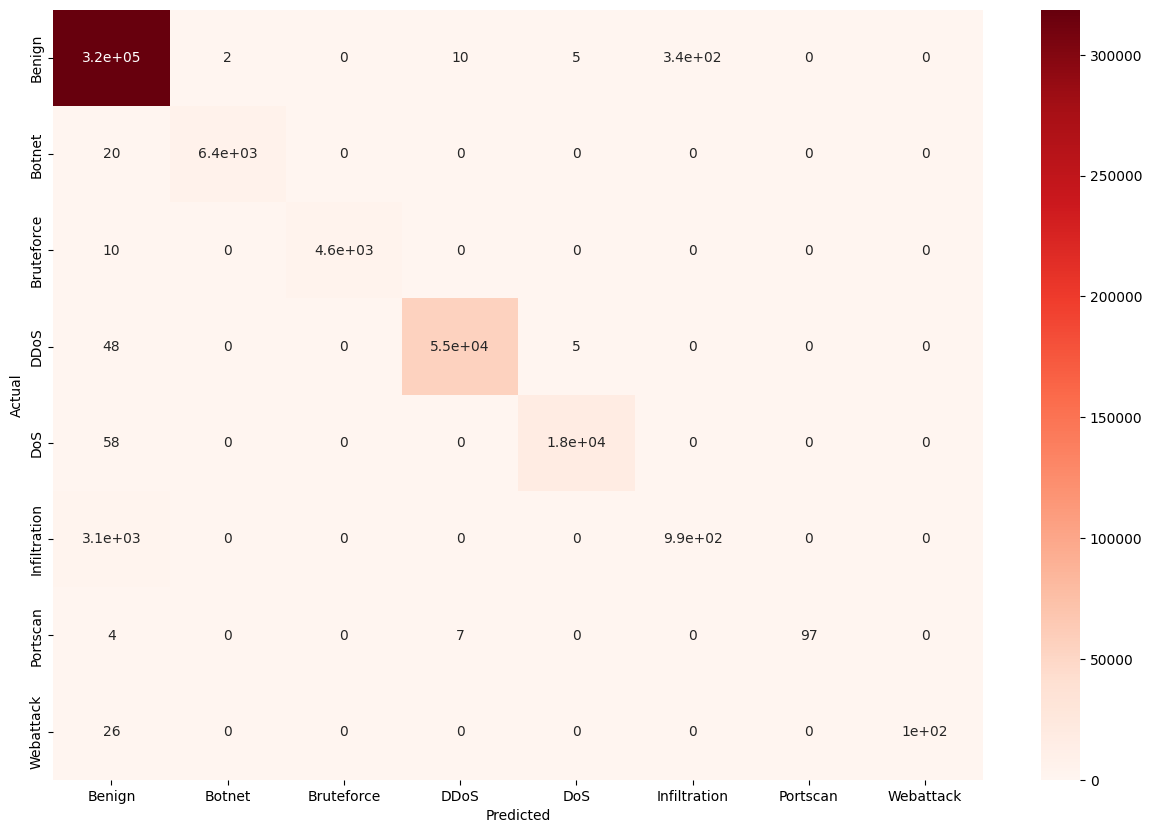


Classification Report:
{'Benign': {'precision': 0.9897498656611181, 'recall': 0.9988714981175961, 'f1-score': 0.9942897618237814, 'support': 319007.0}, 'Botnet': {'precision': 0.9996887643946467, 'recall': 0.9968963376784605, 'f1-score': 0.9982905982905982, 'support': 6444.0}, 'Bruteforce': {'precision': 1.0, 'recall': 0.9978476108480413, 'f1-score': 0.9989226459814695, 'support': 4646.0}, 'DDoS': {'precision': 0.9996931130968499, 'recall': 0.9990438563258827, 'f1-score': 0.9993683792611843, 'support': 55431.0}, 'DoS': {'precision': 0.9994290282060067, 'recall': 0.9966974148730213, 'f1-score': 0.9980613524917323, 'support': 17562.0}, 'Infiltration': {'precision': 0.7424924924924925, 'recall': 0.23987387824399709, 'f1-score': 0.3626031164069661, 'support': 4123.0}, 'Portscan': {'precision': 1.0, 'recall': 0.8981481481481481, 'f1-score': 0.9463414634146341, 'support': 108.0}, 'Webattack': {'precision': 1.0, 'recall': 0.7952755905511811, 'f1-score': 0.8859649122807018, 'support': 127.0},

Accuracy Score,▁
Training time (seconds),▁
f1-score_avg,▁
precision_avg,▁
recall_avg,▁
Accuracy Score,0.99099
Training time (seconds),682.0057
f1-score_avg,0.98882
precision_avg,0.9893
recall_avg,0.99099


Train operation time: =  13932.632614135742 seconds

Model: GradientBoostingClassifier
Confusion Matrix:
[[318052      7      1    146    232     81    469     19]
 [    30   6414      0      0      0      0      0      0]
 [    18      0   4628      0      0      0      0      0]
 [   439      0      0  54969     12      0     11      0]
 [   607      0      0      1  16953      0      1      0]
 [  1860      0      0      0      0   2203     60      0]
 [    56      0      0      0      5      9     38      0]
 [    25      0      0      0      0      0      0    102]]


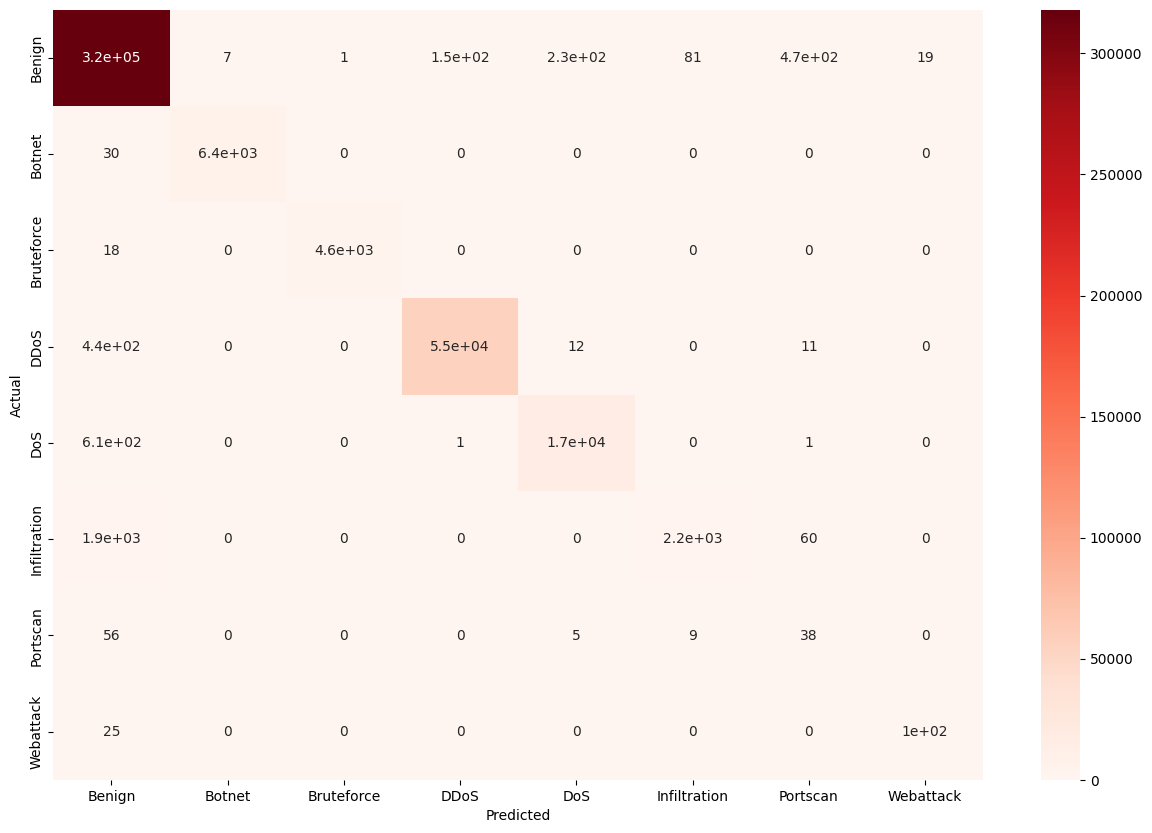


Classification Report:
{'Benign': {'precision': 0.9905477331688919, 'recall': 0.9970063352841787, 'f1-score': 0.9937665405393582, 'support': 319007.0}, 'Botnet': {'precision': 0.9989098271297305, 'recall': 0.9953445065176909, 'f1-score': 0.9971239797901282, 'support': 6444.0}, 'Bruteforce': {'precision': 0.9997839706200043, 'recall': 0.9961256995264743, 'f1-score': 0.9979514824797844, 'support': 4646.0}, 'DDoS': {'precision': 0.9973328978880905, 'recall': 0.9916653136331656, 'f1-score': 0.9944910309642052, 'support': 55431.0}, 'DoS': {'precision': 0.985524938960586, 'recall': 0.9653228561667236, 'f1-score': 0.9753192958232655, 'support': 17562.0}, 'Infiltration': {'precision': 0.9607501090274749, 'recall': 0.5343196701430997, 'f1-score': 0.686720698254364, 'support': 4123.0}, 'Portscan': {'precision': 0.06563039723661486, 'recall': 0.35185185185185186, 'f1-score': 0.11062590975254731, 'support': 108.0}, 'Webattack': {'precision': 0.8429752066115702, 'recall': 0.8031496062992126, 'f1-s

Accuracy Score,▁
Training time (seconds),▁
f1-score_avg,▁
precision_avg,▁
recall_avg,▁
Accuracy Score,0.98996
Training time (seconds),13932.63261
f1-score_avg,0.98978
precision_avg,0.9909
recall_avg,0.98996


Train operation time: =  1.5994398593902588 seconds

Model: KNeighborsClassifier
Confusion Matrix:
[[317304     22     27    390    277    953     19     15]
 [    27   6416      0      1      0      0      0      0]
 [    17      0   4629      0      0      0      0      0]
 [   225      0      0  55191     15      0      0      0]
 [   200      0      0     18  17344      0      0      0]
 [  2461      0      0      7      1   1654      0      0]
 [    29      0      0     10      0      0     69      0]
 [    20      0      0      1      0      0      0    106]]


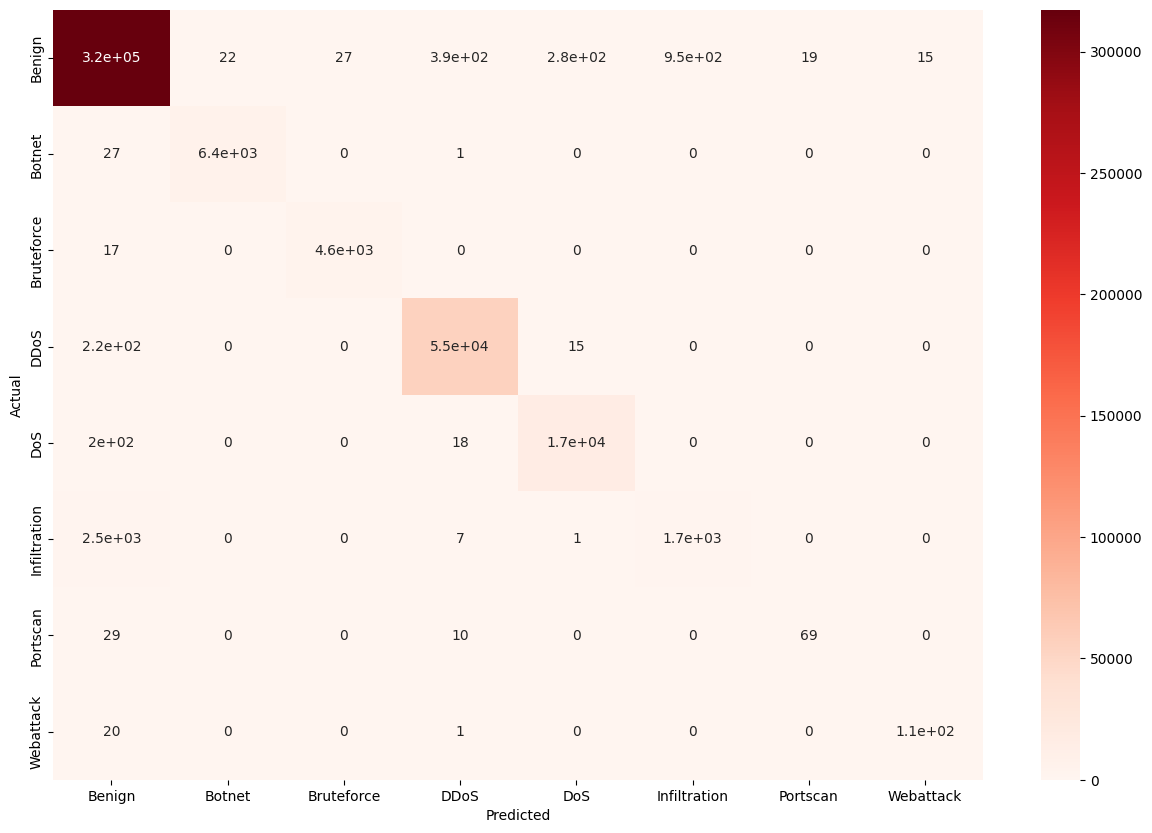


Classification Report:
{'Benign': {'precision': 0.9906988507039087, 'recall': 0.9946615591507396, 'f1-score': 0.9926762502150823, 'support': 319007.0}, 'Botnet': {'precision': 0.9965827896862379, 'recall': 0.9956548727498448, 'f1-score': 0.9961186151218754, 'support': 6444.0}, 'Bruteforce': {'precision': 0.9942010309278351, 'recall': 0.9963409384416703, 'f1-score': 0.9952698344442055, 'support': 4646.0}, 'DDoS': {'precision': 0.9923226293645941, 'recall': 0.9956702927964496, 'f1-score': 0.9939936424461273, 'support': 55431.0}, 'DoS': {'precision': 0.9833871973691671, 'recall': 0.9875868352123904, 'f1-score': 0.9854825421176738, 'support': 17562.0}, 'Infiltration': {'precision': 0.634445723053318, 'recall': 0.40116420082464227, 'f1-score': 0.4915304606240713, 'support': 4123.0}, 'Portscan': {'precision': 0.7840909090909091, 'recall': 0.6388888888888888, 'f1-score': 0.7040816326530611, 'support': 108.0}, 'Webattack': {'precision': 0.8760330578512396, 'recall': 0.8346456692913385, 'f1-sc

Accuracy Score,▁
Training time (seconds),▁
f1-score_avg,▁
precision_avg,▁
recall_avg,▁
Accuracy Score,0.98838
Training time (seconds),1.59944
f1-score_avg,0.98744
precision_avg,0.98704
recall_avg,0.98838


In [ ]:
# Loop through models and evaluate each one
for model_name, model in models.items():
    wandb.init(project="ML-model-baselines-cicids-dataset", name=model_name)
    
    # For SVM and Logistic Regression, use scaled data
    if model_name in ["Logistic Regression", "Support Vector Machine (SVM)"]:
        conf_matrix, class_report, acc_score = evaluate_model(model, X_train_scaled_df, y_train_df, X_test_scaled_df, y_test_df)
        wandb_log(conf_matrix, class_report, acc_score)
    else:
        conf_matrix, class_report, acc_score = evaluate_model(model, X_train_df, y_train_df, X_test_df, y_test_df)
        wandb_log(conf_matrix, class_report, acc_score)
        
    wandb.finish()

In [18]:
wandb.finish()

wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
